<a href="https://colab.research.google.com/github/PaulaBDS/minitarea4/blob/master/minitarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001 : Ciencia de Datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo

##Minitarea 4: Análisis de Cubo de datos extragaláctico y querys.

###Objetivos:
1. Utilizar el paquete **astropy** para trabajar con unidades de medidas, coordenadas y fits.
2. Utilizar datos del google drive personal de cada uno.
3. Lectura de archivos *fits* en objetos extragalácticos en forma de cubo de datos.
4. Utilizar el paquete **astroquery** para hacer query de objetos del SDSS.



###Instrucciones:

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
3. Abrir [Google Colab](https://colab.research.google.com/) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
6. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.




#1. FITS en Google Drive.

En el siguiente enlace [(link)](https://docs.google.com/spreadsheets/d/1lT4h9Evwm6i2SBeuCK5dESTm8FijVZX7r6ixq-dt3ZM/edit#gid=0) se encuentra un excel con 30 galaxias observadas con CALIFA usando la técnica de Integral Field Spectroscopy (IFS). Debe escoger una galaxia que se encuentre disponible anotando su nombre en la casilla correspondiente a la galaxia que desee escoger (**No puede elegir una ya escojida por alguien más**). A cada galaxia le corresponde un link con el cual se pueden descargar los datos obtenidos por CALIFA para dicha galaxia en un cubo de datos **fits.gz**.

Descargue el archivo correspondiente y súbalo a la cuenta de Google Drive vinculada con la cuenta de Google que utiliza para trabajar con [Google Colab](https://colab.research.google.com/). Asegúrese que el archivo de descarga corresponde con la galaxia seleccionada, en caso contrario hágalo saber al equipo docente.

Ahora importe los paquetes y funciones necesarias vistas en clases para poder montar su unidad de Google drive. Si lo hace correctamente debiese aparecer un mensaje. Verifique que se muestra al correr esas líneas de código.

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 2. Visualización de la Galaxia 

En esta parte debe hacer lectura del cubo de datos **fits.gz** que se encuentra guardado en su Google Drive. Importe todos los paquetes que sean necesarios, no olvide leer el header (Ya sea en su forma normal o en WCS) e imprímalo en pantalla.

In [15]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

file = ('/content/gdrive/My Drive/NGC7819.V500.rscube.fits.gz')
hdu = fits.open(file)[0]
header = hdu.header
wcs = WCS(header)
print(wcs)
print('\nHEADER:\n')
header

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVELENGTH'  
CRVAL : 1.101693322322549  31.47187616999986  3749.0  
CRPIX : 34.0  33.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.00027777777777777  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000277777777777777  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  2.0  
NAXIS : 78  72  1877

HEADER:



SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                   78 / length of data axis 1                          
NAXIS2  =                   72 / length of data axis 2                          
NAXIS3  =                 1877                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
HIERARCH V500 PPAK P1 LONGSTRN = 'OGIP 1.0' / The HEASARC Long String Convention
HIERARCH V500 PPAK P1 PVERSION = '1.0     ' / PMAS fitsheader version           
HIERARCH V500 PPAK P1 FILENAME = 'run196_00956a.fits' / original filename       
HIERARCH V500 PPAK P1 DATE = '2011-09-25T23:04:34' / file creation              
HIERARCH V500 PPAK P1 OBSERVER = 'Montoya -- Sanchez'                           
HIERARCH V500 PPAK P1 OBJECT

Ahora haga un subplot que contemple 4 imágenes de la galaxia en 4 diferentes longitudes de onda de todo el espectro observado. Usted debe escoger estas cuatro longitudes de onda como se le antoje. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

**Consejo**: Dentro de las longitudes de onda, se sugiere que escoja una cercana a los 6563 Angstrom.

(1877, 72, 78)


Text(0.5,1,'Wavelength: 4449 [$\\AA$]')

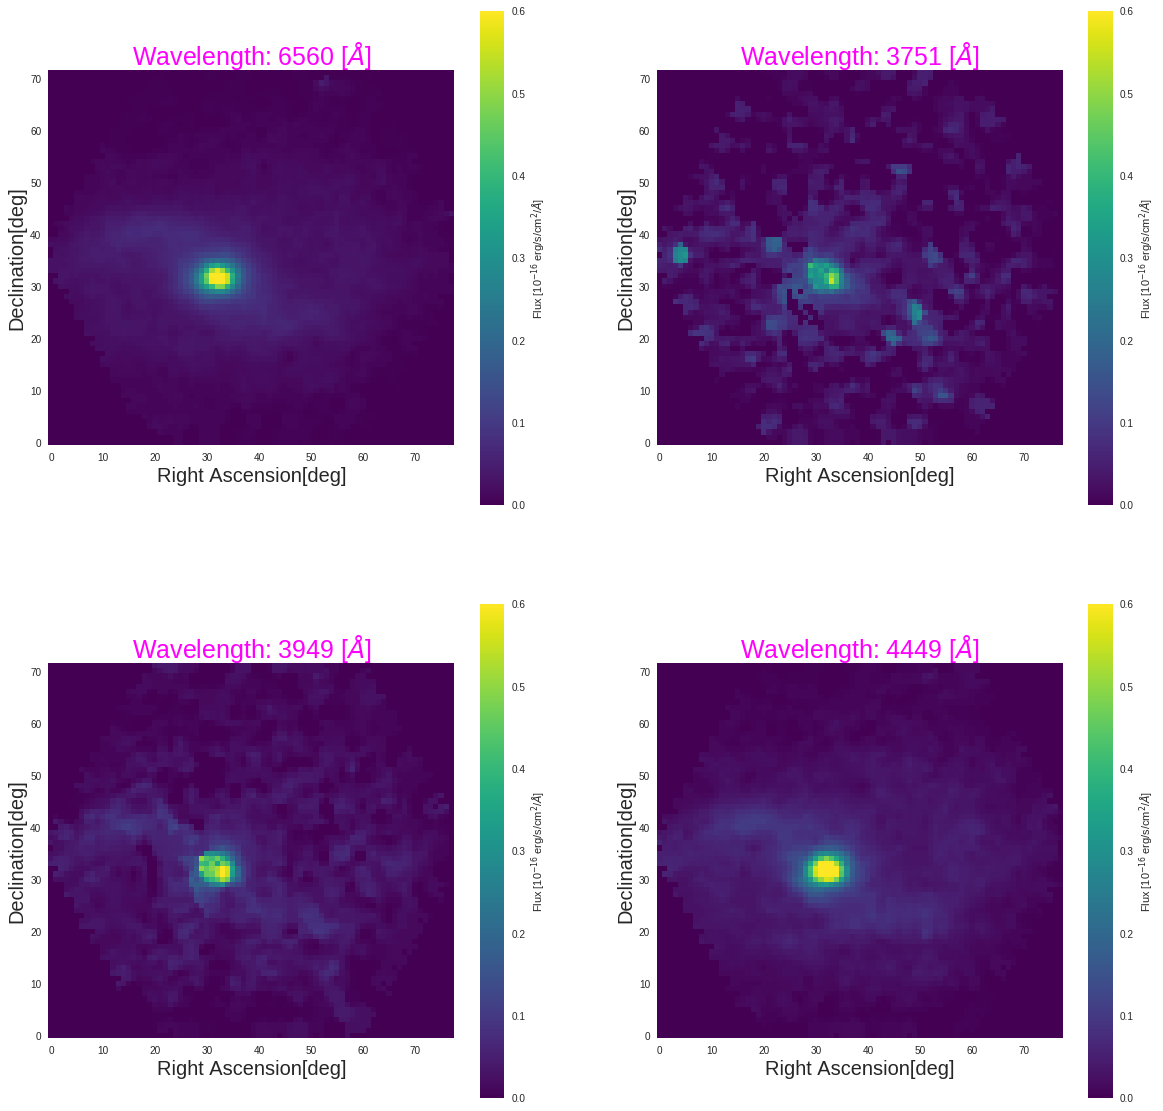

In [16]:
# Primero se obtiene la imagen
data = hdu.data
print(data.shape)

# Creamos variables con arreglos y datos del header para luego cambiar los valores de los ejes a cantidades físicas

delt1 = np.arange(0,header['NAXIS1']) - (header['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + header['CRVAL1']

delt2 = np.arange(0,header['NAXIS2']) - (header['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + header['CRVAL2']


#ax[0,0].set_xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3)))
#ax[0,0].set_yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3)))

# Luego se crea la figura con los subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# Gráfico para long de onda 6560 Angstrom
cb1=ax[0,0].imshow(data[1407], origin='lower', vmax=0.6, vmin=0, cmap='viridis')
fig.colorbar(cb1, ax=ax[0,0], label='Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
ax[0,0].grid(b=None)

ax[0,0].set_xlabel('Right Ascension[deg]', size=20)
ax[0,0].set_ylabel('Declination[deg]', size=20)
ax[0,0].set_title('Wavelength: 6560 [$\AA$]', size=25, color='magenta')


# Gráfico para long de onda 3751 Angstrom
cb2=ax[0,1].imshow(data[1], origin='lower', vmax=0.6, vmin=0, cmap='viridis')
fig.colorbar(cb2, ax=ax[0,1], label='Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
ax[0,1].grid(b=None)

ax[0,1].set_xlabel('Right Ascension[deg]', size=20)
ax[0,1].set_ylabel('Declination[deg]', size=20)
ax[0,1].set_title('Wavelength: 3751 [$\AA$]', size=25, color='magenta')


# Gráfico para long de onda 3949 Angstrom
cb3=ax[1,0].imshow(data[100], origin='lower', vmax=0.6, vmin=0, cmap='viridis')
fig.colorbar(cb3, ax=ax[1,0], label='Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
ax[1,0].grid(b=None)

ax[1,0].set_xlabel('Right Ascension[deg]', size=20)
ax[1,0].set_ylabel('Declination[deg]', size=20)
ax[1,0].set_title('Wavelength: 3949 [$\AA$]', size=25, color='magenta')


# Gráfico para long de onda 4449 Angstrom
cb4=ax[1,1].imshow(data[500], origin='lower', vmax=0.6, vmin=0, cmap='viridis')
fig.colorbar(cb4, ax=ax[1,1], label='Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
ax[1,1].grid(b=None)

ax[1,1].set_xlabel('Right Ascension[deg]', size=20)
ax[1,1].set_ylabel('Declination[deg]', size=20)
ax[1,1].set_title('Wavelength: 4449 [$\AA$]', size=25, color='magenta')

#3. Espectros de la Galaxia

Como saben, a cada pixel le corresponde un espectro. Ahora haga un subplot que contemple el espectro de 9 pixeles de la galaxia. 8 de los 9 pixeles deben ser escogidos al azar, mientras que uno de ellos debe corresponder al espectro de los pixeles de referencia que el header indica. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

Finalmente calcule el redshift al cual se encuentra el objeto, para ello puede indentificar las líneas de los espectros obtenidos en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx). El cálculo del redshift debe hacerse con la información de los espectros del fits. Ignore la rotación de la galaxia. 

**Hint:** Le puede ser útil saber que la línea de H$\alpha$ se encuentra centrada en 6563 Angstroms. La longitud de onda de las primeras líneas de la serie de Balmer las puede encontrar en [aquí](https://es.wikipedia.org/wiki/L%C3%ADneas_de_Balmer). Imprima en pantalla la operación a realizar y que línea o líneas usó para determinar el redshift al cual se encuentra la galaxia.

Text(0.5,1,'Espectro del Pixel 71,77')

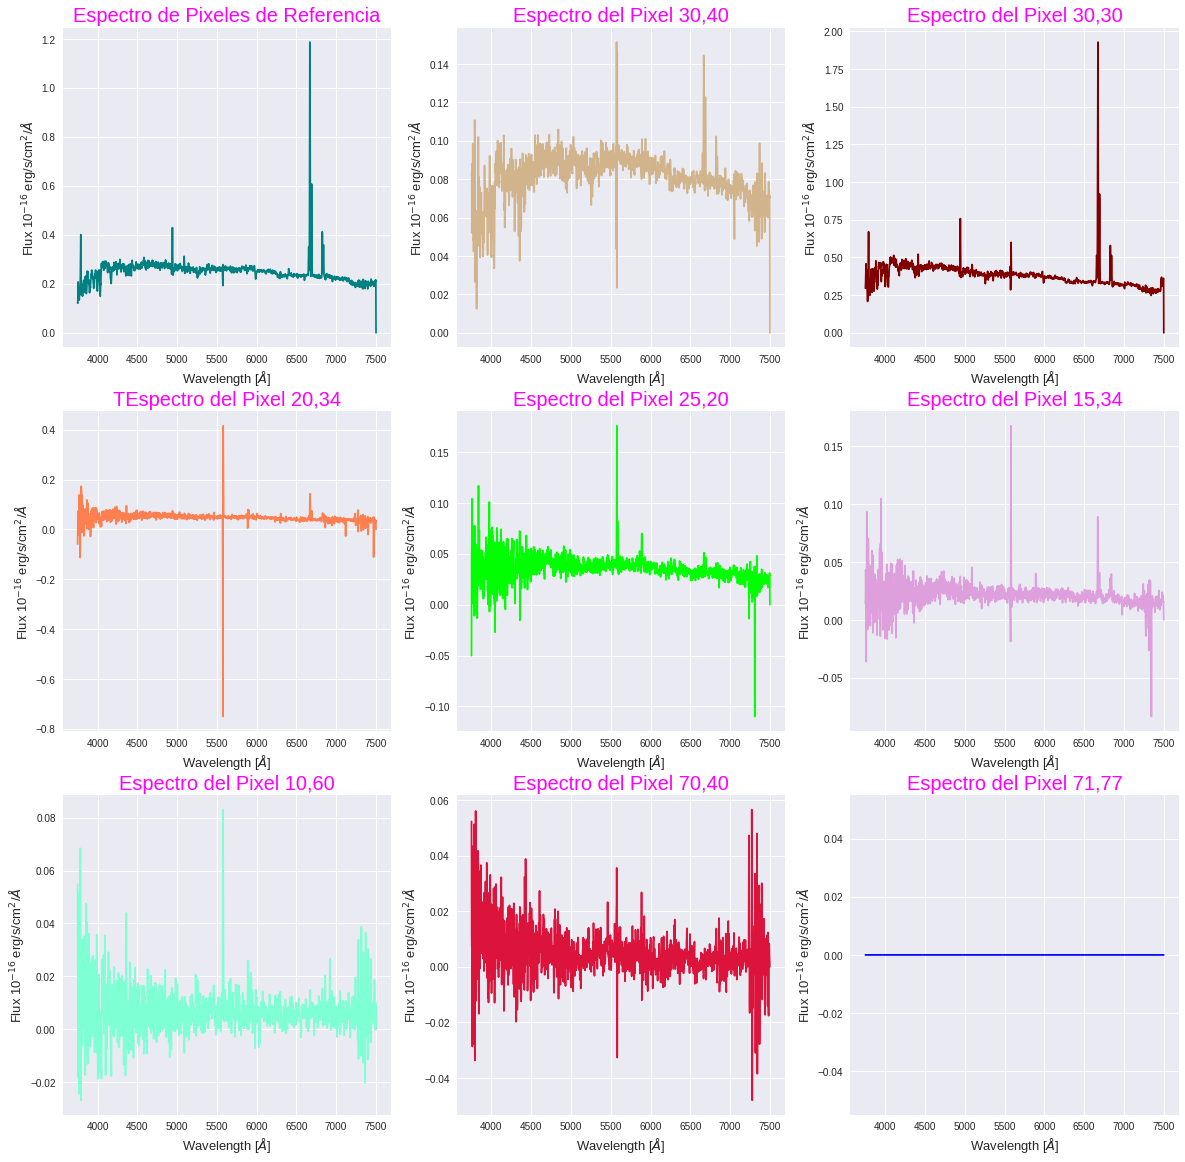

In [52]:

delt3 = np.arange(0,header['NAXIS3'])
step3 = delt3*header['CD3_3']
lo = step3 + header['CRVAL3']

# Se crea la figura con los subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))


# espectro de los pixeles de referencia

ax[0,0].plot(lo,data[:,34,35], c='teal')
ax[0,0].set_xlabel('Wavelength [$\AA$]', size=13)
ax[0,0].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[0,0].set_title('Espectro de Pixeles de Referencia', size=20, color='magenta')


# espectros de otros pixeles:

ax[0,1].plot(lo,data[:,30,40], c='tan')
ax[0,1].set_xlabel('Wavelength [$\AA$]', size=13)
ax[0,1].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[0,1].set_title('Espectro del Pixel 30,40', size=20, color='magenta')


ax[0,2].plot(lo,data[:,30,30], c='maroon')
ax[0,2].set_xlabel('Wavelength [$\AA$]', size=13)
ax[0,2].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[0,2].set_title('Espectro del Pixel 30,30', size=20, color='magenta')


ax[1,0].plot(lo,data[:,20,34], c='coral')
ax[1,0].set_xlabel('Wavelength [$\AA$]', size=13)
ax[1,0].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[1,0].set_title('TEspectro del Pixel 20,34', size=20, color='magenta')


ax[1,1].plot(lo,data[:,25,20], c='lime')
ax[1,1].set_xlabel('Wavelength [$\AA$]', size=13)
ax[1,1].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[1,1].set_title('Espectro del Pixel 25,20', size=20, color='magenta')


ax[1,2].plot(lo,data[:,15,34], c='plum')
ax[1,2].set_xlabel('Wavelength [$\AA$]', size=13)
ax[1,2].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[1,2].set_title('Espectro del Pixel 15,34', size=20, color='magenta')


ax[2,0].plot(lo,data[:,10,60], c='aquamarine')
ax[2,0].set_xlabel('Wavelength [$\AA$]', size=13)
ax[2,0].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[2,0].set_title('Espectro del Pixel 10,60', size=20, color='magenta')


ax[2,1].plot(lo,data[:,70,40], c='crimson')
ax[2,1].set_xlabel('Wavelength [$\AA$]', size=13)
ax[2,1].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[2,1].set_title('Espectro del Pixel 70,40', size=20, color='magenta')


ax[2,2].plot(lo,data[:,71,77], c='b')
ax[2,2].set_xlabel('Wavelength [$\AA$]', size=13)
ax[2,2].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$', size=13)
ax[2,2].set_title('Espectro del Pixel 71,77', size=20, color='magenta')



In [0]:
# Redshift



#4. Coordenadas

En esta parte deben crear una variable que contenga un objeto SkyCoord definido con los dos últimos dígitos de rut como ascención recta y declinación en el sistema ICRS (No contar el dígito verificador).

**Ejemplo:** si su RUT es 12.345.678 - 9. La ascención recta y declinación para ese objeto debe ser 78°. Si los úlitmos dos dígitos son mayores que noventa, utilice solo el último.

In [18]:
from astropy import units as u
from astropy.coordinates import SkyCoord

# SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
# Para esto crearé una función

def Rut_Sky(rut):
  assert type(rut)==str
  if int(rut[8]+rut[9])>90:
    return SkyCoord(ra=int(rut[9])*u.degree, dec=int(rut[9])*u.degree, frame='icrs')
  else:
    return SkyCoord(ra=int(rut[8]+rut[9])*u.degree, dec=int(rut[8]+rut[9])*u.degree, frame='icrs')
  
a=Rut_Sky('12.345.678 - 9')
b=Rut_Sky('12.345.698-8')
print(a)
print(b)


<SkyCoord (ICRS): (ra, dec) in deg
    (78., 78.)>
<SkyCoord (ICRS): (ra, dec) in deg
    (8., 8.)>


#5. Query: Imagen

En esta parte haga un query a los datos del SDSS utilizando como coordenadas las definidas anteriormente en una región de radio 10 arcsec, además, asegúrese que los objetos de la busqueda cuentan con un espectro. En caso de no encontrar algo, multiplique el radio por 2 hasta encontrar un objeto. Extraiga el espectro y la fotometría en las bandas z e i.

Imprima en pantalla el WCS header de alguno de los fits fotometría, y proceda a graficar las regiones mostradas en los dos fits fotométricos descargados. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Como los datos son del SDSS, ustedes encontraran una imagen de la placa entera, hagan un zoom mostrando de forma cercana el objeto que les debiese haber salido al azar, queda a su criterio cuanto deben ampliar la imagen ustedes.

In [19]:
# Primero se instala astroquery
!pip install astroquery

In [20]:
from astroquery.sdss import SDSS
# luego se selecciona una región del espacio
pos = Rut_Sky('20.287.013 - 9')
xid = SDSS.query_region(pos, radius = 80*u.arcsec, spectro=True) 
print xid[0]

       ra              dec               objid        run  rerun camcol field       z       plate  mjd  fiberID      specobjid      run2d  instrument
---------------- ---------------- ------------------- ---- ----- ------ ----- ------------- ----- ----- ------- ------------------- ------ ----------
12.9841821643616 12.9810869088417 1237678920210186537 7787   301      5   286 -0.0002469062  6206 56245     320 6987422887569977344 v5_7_0       BOSS


In [50]:
# luego se obtienen datos del xid, como espectro e y fotometría de bandas respectivamente

sp = SDSS.get_spectra(matches=xid)
imz = SDSS.get_images(matches=xid, band='z')
imi = SDSS.get_images(matches=xid, band='i')

# Imprimiendo el header del fits de la fotometría para la banda z
header_z = imz[0][0].header
wcs_z = WCS(header_z)
print(wcs_z)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 12.9561871459  12.9078281257  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : 3.34923767221e-06  0.000109986612057  
CD2_1 CD2_2  : 0.000109927062893  -3.29374189022e-06  
NAXIS : 2048  1489


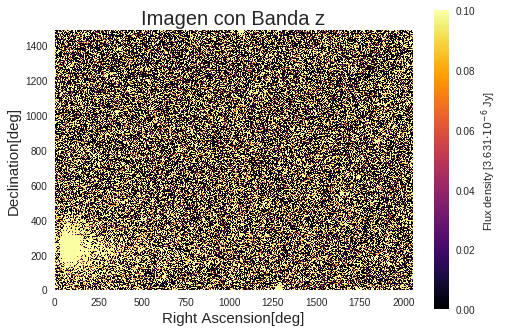

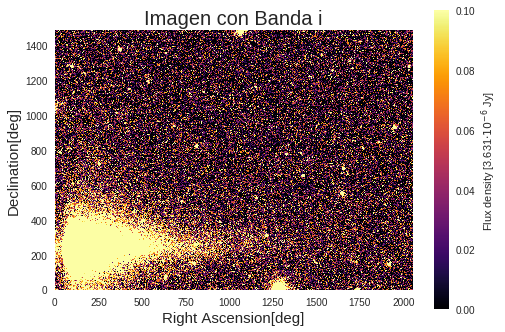

In [49]:
# graficando las regiones mostradas de los dos fits fotométricos descargados


data_z=imz[0][0].data
data_i=imi[0][0].data


#imagen de la banda z
plt.imshow(data_z, cmap='inferno', origin='lower', vmin=0, vmax=0.1)
plt.grid(b=None)
plt.title('Imagen con Banda z', size=20)
plt.xlabel('Right Ascension[deg]', size=15)
plt.ylabel('Declination[deg]', size=15)
cb5=plt.colorbar()
cb5.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#imagen de la banda i

plt.imshow(data_i, cmap='inferno', origin='lower', vmin=0, vmax=0.1)
plt.grid(b=None)
plt.title('Imagen con Banda i', size=20)
plt.xlabel('Right Ascension[deg]', size=15)
plt.ylabel('Declination[deg]', size=15)
cb6=plt.colorbar()
cb6.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()



#6. Query: Espectro

En esta parte haga un gráfico con los datos espectroscópicos del objeto encontrado. Imprima en pantalla el WCS header. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Compare el objeto con el encontrado en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx), identifique las líneas y hagan que se vean en el espectro bien señalizadas.